<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
from prob140 import *
from datascience import *
import numpy as np
from scipy import special
from itertools import product

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

# Homework 2 #

## 1. Extrema and Tails ##

The maximum and minimum of a random sample of numbers are called the "extrema" of the sample. Distributions of extrema are best described using the left or right hand tail probabilities. In this exercise you will see how.

Fix positive integers $n$ and $N$. Suppose $n$ draws are made at random with replacement from the numbers $\{1, 2, 3, \ldots, N\}$. Let $X_i$ be the number that appears on the $i$th draw.

Let $V_n = \min\{X_1, X_2, \ldots, X_n\}$ be the sample minimum and let $W_n = \max\{X_1, X_2, \ldots, X_n\}$ be the sample maximum.

**a)** The event that a sample maximum is "small" is straightforward to describe in terms of the individual elements of the sample. To see this, fill in the blank with an appropriate mathematical symbol or English phrase. Justify your answer.

Fix an integer $k$ such that $1 \le k \le N$. The event "$W_n \le k$" is the same as the event "each of $X_1, X_2, \ldots, X_n$ is $\underline{less \space then \space or \space equal \space to \space} k$".

It might help to draw the number line, mark the integers 1 through $N$, and put a special mark on $k$. For the maximum to be at or to the left of $k$, where do all the $X$'s have to be?

**b)** For $1 \le k \le N$, use Part **a** to find $P(W_n \le k)$. 

**c)** Use Part **b** to find $P(W_n = k)$ for $1 \le k \le N$ and to show algebraically that $\sum_{k=1}^N P(W_n = k) = 1$.

**d)** Modify Parts **a** through **c** to find the distribution of the sample minimum, as follows. For the event that the sample minimum is "large", fill in the blank with an appropriate mathematical symbol or English phrase. 

The event "$V_n \ge k$" is the same as the event "each of $X_1, X_2, \ldots, X_n$ is $\underline{ greater \space then \space or \space equal \space to \space} k$".

Use this observation and the ideas of the previous parts to find $P(V_n = k)$ for $1 \le k \le N$.

**e)** Let $k$ and $m$ be integers such that $1 \le k \le m \le N$. Find $P(V_n \ge k \mid W_n \le m)$. Compare with the unconditional probability $P(V_n \ge k)$ that you used in Part **d** and show how the comparison indicates an intuitive reasoning for the conditional probability.

#newpage

### 2. Mirror Images ###
Let $D_1, D_2, D_3, D_4$ represent the numbers on four rolls of a die. Let $V = \min\{D_1, D_2, D_3, D_4\}$, $W = \max\{D_1, D_2, D_3, D_4\}$, $S = \sum_{i=1}^4 D_i$.

**a)** If possible, use one of the symbols $\stackrel{d}{=}$ or $=$ to fill in the blank in $D_1 \underline{\stackrel{d}{=}} D_2$. Explain; and if both can be used, say why.

**b)** If possible, use one of the symbols $\stackrel{d}{=}$ or $=$ to fill in the blank in $S \underline{\neq} 4D_1$. Explain; and if both can be used, say why.

**c)** Use the previous exercise and the code cell below to draw the probability histogram of $W$. You will need some `prob140` methods which are used in [Section 3.2](http://prob140.org/textbook/Chapter_03/02_Distributions.html) of the textbook.

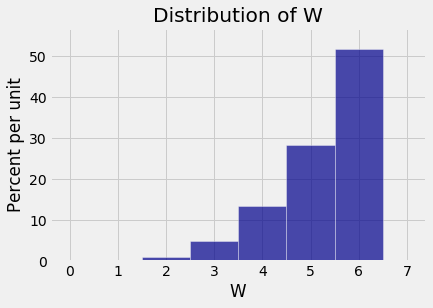

In [27]:

n = 4
N = 6
k = np.arange(1, N+1)

def probability_W_equals_k(k):
    return (k/6)**4-((k-1)/6)**4
# array consisting of P(W=k)
probs_W = probability_W_equals_k(k)

dist_W = Table().with_columns(
    'W', k,
    'P(W)', probs_W
)
Plot(dist_W)
plt.title('Distribution of W');

**d)** Use the code cell below to draw the probability histogram of $V$.

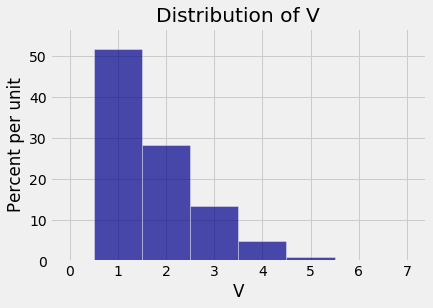

In [28]:

def probability_V_equals_k(v):
    return ((6-(v-1))/6)**4-((6-v)/6)**4
probs_V = probability_V_equals_k(k)
dist_V = Table().with_columns(
    'V', k,
    'P(V)', probs_V
)
Plot(dist_V)
plt.title('Distribution of V');

**e)** Look at the two probability histograms above, and fill in the blanks with numbers. No explanation needed.

$P(V = 2) = P(W = \underline{5}~)$ and $V \stackrel{d}{=} \underline{7} - W$.

#newpage

## 3. A Bound ##
Find a numerical value of $k$ that makes the following statement true:

In $k$ rolls of a fair die, there is at least 99% chance that all six faces will appear.

A good starting point: The complement is a union of which events? Can you bound the chance of a union and thus get an inequality to solve for $k$?

In [22]:
def probability_roll_faces(k):
    if k>=6:
        return 1-(special.comb(6, 1)*(5/6)**k)+(special.comb(6,2)*(4/6)**k)-(special.comb(6, 3)*(3/6)**k)+(special.comb(6, 4)*(2/6)**k)-(special.comb(6,5)*(1/6)**k)
    else:
        return 0
print(probability_roll_faces(36))

0.9915418784295547


#newpage

## 4. No Empty Boxes ##
For two positive integers $m \le n$, there are $m$ boxes labeled 1 through $m$, and $n$ balls. The balls are thrown into the boxes uniformly at random, independently of each other.

Let $p(m, n)$ be the chance that there are no empty boxes after all of the balls have been thrown.

In Parts **(e)** and **(f)** of this exercise you will find a formula for $p(m, n)$ in terms of $m$ and $n$. But before that, see how the formula can be applied. In Parts **(a)** through **(d)**, fill in the blanks. No explanations are necessary for **(a)** through **(d)** but you must show your work or give reasoning for Parts **(e)** and **(f)**.

**a)** The chance of getting at least one head and at least one tail in $n$ tosses of a coin is equal to $p(\underline{2}, \underline{n})$.

Note: In the [textbook](http://prob140.org/textbook/Chapter_02/02_Examples.html) there is a formula for this chance.

**b)** The chance that all six faces appear in $r$ rolls of a die is equal to $p(\underline{6}, \underline{r})$.

**c)** Suppose each person's birthday is equally likely to be any of the 365 days of the year, independently of everyone else's birthday. The chance that you see all 365 days of the year among the birthdays of $n \ge 365$ people is $p(\underline{365}, \underline{n})$. 

**d)** Each box of a breakfast cereal contains one of $c$ different coupons. Once you collect all $c$ coupons, you get a prize. Assume that each box is equally likely to contain any of the $c$ coupons, independently of all the other boxes. If you buy $b$ cereal boxes, the chance that you get a complete set of coupons is $p(\underline{c}, \underline{b})$.

**e)** Find the chance that you see all six faces in $r$ rolls of a die. In an earlier exercise you made the key observation that the complement of the event in question is a union, so use inclusion-exclusion and symmetry. It will help to think about the number of different pairs of faces, the number of different triples of faces, and so on.

**f)** For positive integers $m \le n$, find a formula for $p(m, n)$.

#newpage

### 5. Two IID Random Variables ###

Let $R$ and $S$ be independent and identically distributed (i.i.d.) integer-valued random variables, with distribution given by

$$
P(R = k) ~ = ~ 
\begin{cases} 
c \cdot \frac{1}{k}, ~~ 1 \le k \le 10 \\
0 ~~~~~ \text{otherwise}
\end{cases}
$$

where $c$ is a constant. 

**a)** Find a formula for $c$. You might want to write out all 10 probabilities in terms of $c$ first, but this isn't required.

**b)** Complete the cell below to plot the probability histogram of $R$.

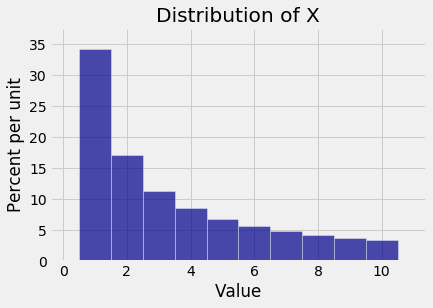

In [39]:
k = np.arange(1, 11)   # array of possible values of R
c = sum(1/k)**-1
p =c/k# array of probabilities of those values
dist_R = Table().values(k).probabilities(p)
Plot(dist_R)
plt.title('Distribution of X');

Before you do the remaining parts it is highly recommended that you read the examples in Section 4.2 of the [textbook](http://prob140.org/textbook/Chapter_04/02_Examples.html).

**c)** Complete the cell below to create `joint_dist`, the joint distribution table of $R$ and $S$.

In [42]:

def joint_probability(x, y):
    """Returns P(R = x, S = y)"""
    return p.item(x-1)*p.item(y-1)

joint_dist = Table().values('R', k, 'S', k).probability_function(joint_probability)
joint_dist

,R=1,R=2,R=3,R=4,R=5,R=6,R=7,R=8,R=9,R=10
S=10,0.011657,0.005828,0.003886,0.002914,0.002331,0.001943,0.001665,0.001457,0.001295,0.001166
S=9,0.012952,0.006476,0.004317,0.003238,0.002590,0.002159,0.001850,0.001619,0.001439,0.001295
S=8,0.014571,0.007285,0.004857,0.003643,0.002914,0.002428,0.002082,0.001821,0.001619,0.001457
S=7,0.016652,0.008326,0.005551,0.004163,0.003330,0.002775,0.002379,0.002082,0.001850,0.001665
S=6,0.019428,0.009714,0.006476,0.004857,0.003886,0.003238,0.002775,0.002428,0.002159,0.001943
S=5,0.023313,0.011657,0.007771,0.005828,0.004663,0.003886,0.003330,0.002914,0.002590,0.002331
S=4,0.029141,0.014571,0.009714,0.007285,0.005828,0.004857,0.004163,0.003643,0.003238,0.002914
S=3,0.038855,0.019428,0.012952,0.009714,0.007771,0.006476,0.005551,0.004857,0.004317,0.003886
S=2,0.058283,0.029141,0.019428,0.014571,0.011657,0.009714,0.008326,0.007285,0.006476,0.005828
S=1,0.116566,0.058283,0.038855,0.029141,0.023313,0.019428,0.016652,0.014571,0.012952,0.011657


**d)** Use the `event` method to find $P(|R - S| = 2)$.

In [43]:
def indicator(x, y):
    return  abs(x - y) ==2
joint_dist.event(indicator, 'R', 'S')

P(Event) = 0.15024019918368425


,R=1,R=2,R=3,R=4,R=5,R=6,R=7,R=8,R=9,R=10
S=10,,,,,,,,0.00145707,,
S=9,,,,,,,0.00185025,,,
S=8,,,,,,0.00242845,,,,0.00145707
S=7,,,,,0.00333045,,,,0.00185025,
S=6,,,,0.0048569,,,,0.00242845,,
S=5,,,0.00777104,,,,0.00333045,,,
S=4,,0.0145707,,,,0.0048569,,,,
S=3,0.0388552,,,,0.00777104,,,,,
S=2,,,,0.0145707,,,,,,
S=1,,,0.0388552,,,,,,,


**e)** For brevity, let $r_k = P(R = k)$ and $s_k = P(S = k)$ for $1 \le k \le 10$. Write a formula for $P(|R - S| \ge 2)$ in terms of $r_1, r_2, \ldots, r_{10}$ and $s_1, s_2, \ldots, s_{10}$. Make sure that the terms that you are adding are all positive; sums should not include any terms that are 0.

Your work will go much faster if you identify a useful example in Section 4.2 of the textbook.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 2 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 2 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**